### Problem 3, Part 3

In [276]:
%pwd

'C:\\Users\\tickn\\ml'

In [277]:
import pandas as pd
iris = pd.read_csv('iris-data.csv')

In [278]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The data set has 5 features. 2 measurements given in centimeters, of the length and width of an iris flowers's sepals. 2 measurements given in centimeters, of the length and width of an iris flower's petals. The 5th feature is the specific class of the iris flower measured. 

In [279]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [280]:
iris["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

From inspection, it appears some class entries may have been misspelled. In addition, several class labels have been mislabeled, not following any kind of labeling standard. These errors will need to  be fixed or removed before data can be used. 

In [281]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is a discrepancy in the count for petal width measurements. This may be due to no entries, or a non valid entry for that field. These errors in the data will need to be cleaned before the data can be used.

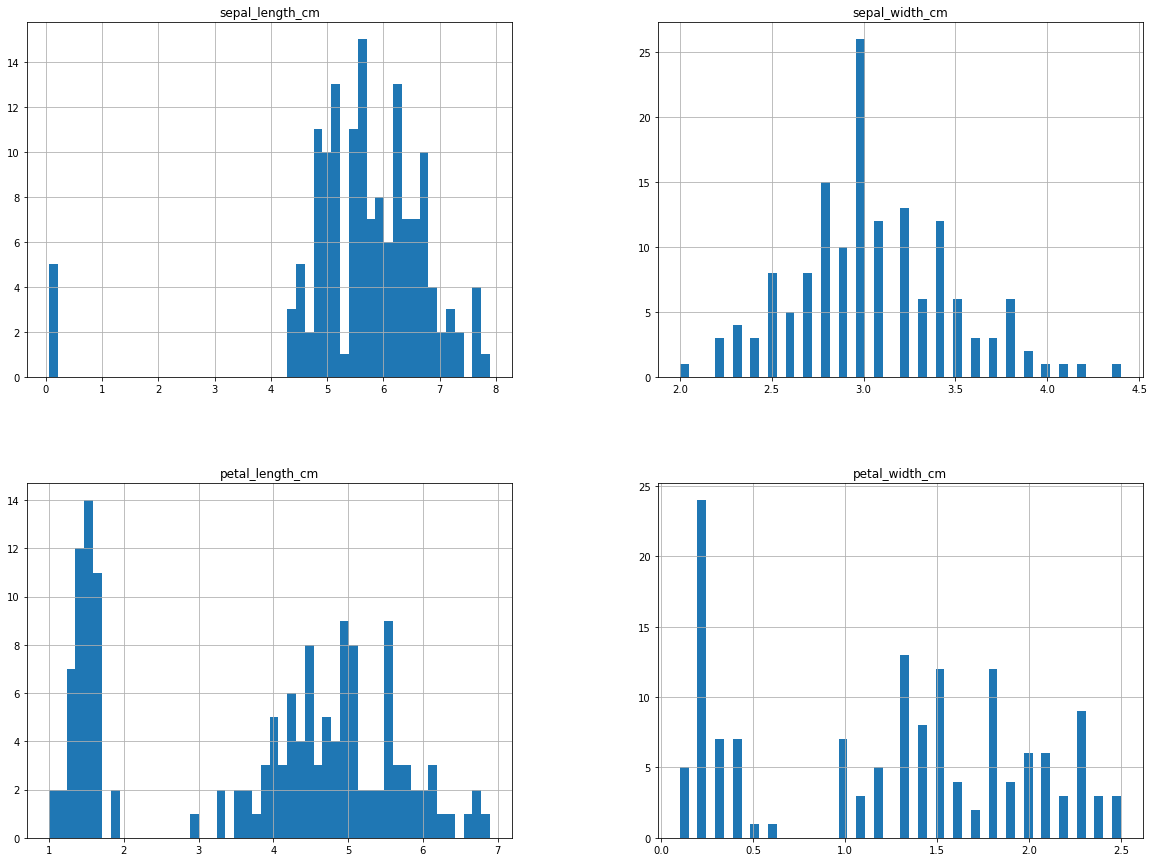

In [282]:
%matplotlib inline  
import matplotlib.pyplot as plt
iris.hist(bins = 50, figsize = (20,15))
plt.show()

Because the data has not been cleaned or fix before being used to plot historgram, we can see outliers in the data. For sepal_length_cm historgram, there is an outlier. Additionally, for petal width and petal length, the data shows two distributions. 

### Problem 3, Part 4

array([[<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_length_cm'>,
        <AxesSubplot:xlabel='sepal_width_cm', ylabel='sepal_length_cm'>,
        <AxesSubplot:xlabel='petal_length_cm', ylabel='sepal_length_cm'>,
        <AxesSubplot:xlabel='petal_width_cm', ylabel='sepal_length_cm'>],
       [<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>,
        <AxesSubplot:xlabel='sepal_width_cm', ylabel='sepal_width_cm'>,
        <AxesSubplot:xlabel='petal_length_cm', ylabel='sepal_width_cm'>,
        <AxesSubplot:xlabel='petal_width_cm', ylabel='sepal_width_cm'>],
       [<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_length_cm'>,
        <AxesSubplot:xlabel='sepal_width_cm', ylabel='petal_length_cm'>,
        <AxesSubplot:xlabel='petal_length_cm', ylabel='petal_length_cm'>,
        <AxesSubplot:xlabel='petal_width_cm', ylabel='petal_length_cm'>],
       [<AxesSubplot:xlabel='sepal_length_cm', ylabel='petal_width_cm'>,
        <AxesSubplot:xlabel='sepal_width_cm', 

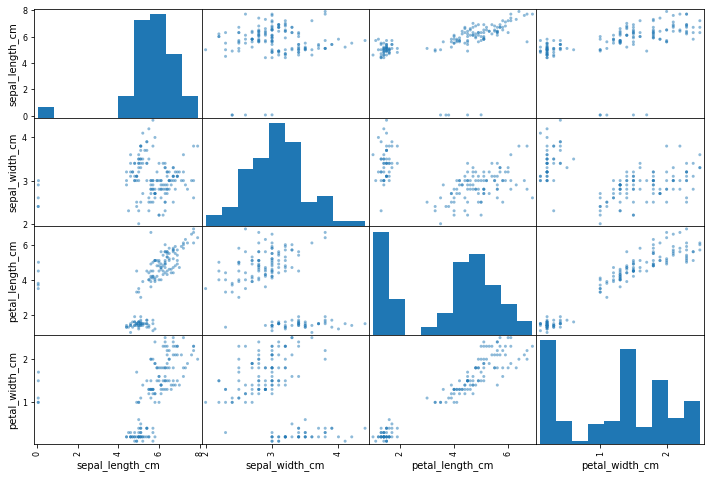

In [283]:
from pandas.plotting import scatter_matrix
attributes = ['sepal_length_cm', 'sepal_width_cm','petal_length_cm','petal_width_cm']
scatter_matrix(iris[attributes], figsize = (12,8))

From the scatter matrix, there are some correlations that can be observed. There is a positive, linear correlation between petal length and width. Additionally, there is a positive, linear correlation between sepal length and petal lenght. However, the positive correlation between the latter is not as strong as the former. Interestingly, there does not appear to be a correlation between sepal length and sepal width measured. 

### Problem 3, Part 5

In [284]:
iris.dropna(inplace=True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [285]:
iris['class'].replace('versicolor','Iris-versicolor',inplace=True)
iris['class'].replace('Iris-setossa','Iris-setosa',inplace=True)

In [286]:
iris["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

In [287]:
iris.drop(iris[((iris['class'].str.contains('Iris-setosa')==True) & (iris['sepal_width_cm'] < 2.5))].index,inplace=True)

Search for values under class Iris-veriscolor less than 1 if not converted to cm.

In [288]:
iris[(iris['class'].str.contains('Iris-versicolor')==True) & (iris['sepal_length_cm'] < 1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Search and verify values have been replaced. If success, return blank.

In [289]:
iris['sepal_length_cm'].replace([0.067,0.060,0.057,0.055],[6.7,6.0,5.7,5.5],inplace=True)

In [290]:
iris.drop(iris[((iris['class'].str.contains('Iris-setosa')==True) & (iris['sepal_width_cm'] < 2.5))].index,inplace=True)

In [291]:
iris.dropna(inplace=True)

In [292]:
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [293]:
iris_cat = iris[['class']]
iris_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   144 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [294]:
from sklearn.preprocessing import OneHotEncoder
iris_encoder = OneHotEncoder()
iris_cat_1hot = iris_encoder.fit_transform(iris_cat)
iris_cat_1hot

<144x3 sparse matrix of type '<class 'numpy.float64'>'
	with 144 stored elements in Compressed Sparse Row format>

In [295]:
iris_cat_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [296]:
iris_encoder.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [297]:
iris.to_csv('iris-cleaned.csv')